# GANs
- Sara Echeverría 21371
- Ricardo Mendez 21289

Repository link: https://github.com/bl33h/gans

In [23]:
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
import random
import os

In [24]:
# load the csv files
landmarks = pd.read_csv('./data/list_landmarks_align_celeba.csv')
partitions = pd.read_csv('./data/list_eval_partition.csv')
attributes = pd.read_csv('./data/list_attr_celeba.csv')
bbox = pd.read_csv('./data/list_bbox_celeba.csv')

# directory where the images are located
imageDir = './data/img_align_celeba/img_align_celeba'

In [25]:
# target size for resizing
targetSize = (224, 224)

# percentage to crop from the edges
cropPercentage = 0.10

In [26]:
# # create a list to store processed images
# processedImages = []

# # loop over all images in the dataset
# imageNames = attributes['image_id']  # full dataset

# for idx, imageName in enumerate(imageNames):
#     # get the image path
#     imagePath = os.path.join(imageDir, imageName)

#     # load the image
#     try:
#         image = Image.open(imagePath)

#         # get the original image dimensions
#         width, height = image.size

#         # calculate how much to crop from each side
#         cropX = int(width * cropPercentage)
#         cropY = int(height * cropPercentage)

#         # crop the image slightly to remove some of the background
#         croppedImage = image.crop((
#             cropX,             # left
#             cropY,             # top
#             width - cropX,     # right
#             height - cropY     # bottom
#         ))

#         # step 1: resize the cropped image to 224x224
#         imageResized = croppedImage.resize(targetSize)

#         # step 2: normalize the image (scale pixel values to [0, 1])
#         imageArray = np.array(imageResized) / 255.0

#         # store the processed image in the list
#         processedImages.append(imageArray)

#         # show progress every 100 images
#         if idx % 100 == 0:
#             print(f"-> processed {idx} images")

#     except Exception as e:
#         print(f"!error processing image {imageName}: {e}")

In [27]:

# create a list to store processed images
processedImages = []

# limit to the first 15,000 images
imageNames = attributes['image_id'][:15000]

# loop over the first 15,000 images in the dataset
for idx, imageName in enumerate(imageNames):
    # get the image path
    imagePath = os.path.join(imageDir, imageName)

    # load the image
    try:
        image = Image.open(imagePath)

        # get the original image dimensions
        width, height = image.size

        # calculate how much to crop from each side
        cropX = int(width * cropPercentage)
        cropY = int(height * cropPercentage)

        # crop the image slightly to remove some of the background
        croppedImage = image.crop((
            cropX,             # left
            cropY,             # top
            width - cropX,     # right
            height - cropY     # bottom
        ))

        # step 1: resize the cropped image to 224x224
        imageResized = croppedImage.resize(targetSize)

        # step 2: normalize the image (scale pixel values to [0, 1])
        imageArray = np.array(imageResized) / 255.0

        # store the processed image in the list
        processedImages.append(imageArray)

        # show progress every 100 images
        if idx % 100 == 0:
            print(f"-> processed {idx} images")

    except Exception as e:
        print(f"!error processing image {imageName}: {e}")

-> processed 0 images
-> processed 100 images
-> processed 200 images
-> processed 300 images
-> processed 400 images
-> processed 500 images
-> processed 600 images
-> processed 700 images
-> processed 800 images
-> processed 900 images
-> processed 1000 images
-> processed 1100 images
-> processed 1200 images
-> processed 1300 images
-> processed 1400 images
-> processed 1500 images
-> processed 1600 images
-> processed 1700 images
-> processed 1800 images
-> processed 1900 images
-> processed 2000 images
-> processed 2100 images
-> processed 2200 images
-> processed 2300 images
-> processed 2400 images
-> processed 2500 images
-> processed 2600 images
-> processed 2700 images
-> processed 2800 images
-> processed 2900 images
-> processed 3000 images
-> processed 3100 images
-> processed 3200 images
-> processed 3300 images
-> processed 3400 images
-> processed 3500 images
-> processed 3600 images
-> processed 3700 images
-> processed 3800 images
-> processed 3900 images
-> processed

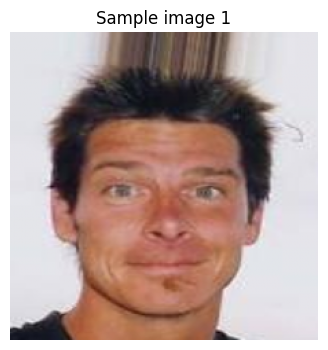

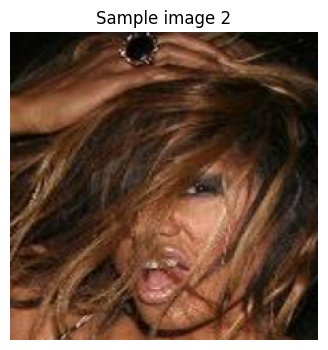

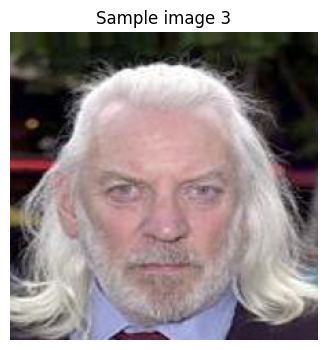

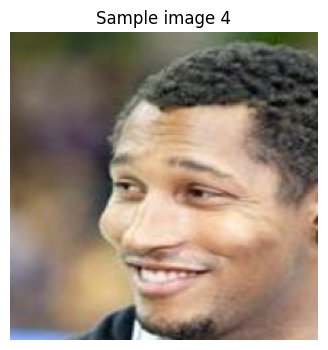

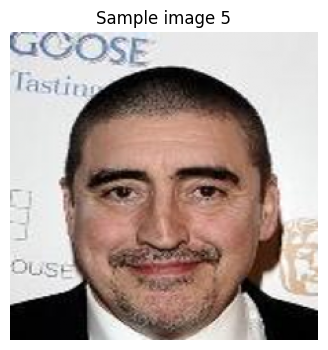

In [28]:
# show 5 random images from the processed images
randomImages = random.sample(processedImages, 5)

# display the 5 random images
for i, imgArray in enumerate(randomImages):
    plt.figure(figsize=(4, 4))
    plt.imshow(imgArray)
    plt.axis('off')
    plt.title(f"Sample image {i+1}")
    plt.show()

In [29]:
import tensorflow as tf
from tensorflow.keras import layers

def build_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(256, input_dim=100))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(1024))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(np.prod(targetSize) * 3, activation='tanh'))
    model.add(layers.Reshape((targetSize[0], targetSize[1], 3)))
    return model

def build_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Flatten(input_shape=(targetSize[0], targetSize[1], 3)))
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model


In [30]:
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0002, 0.5), metrics=['accuracy'])

generator = build_generator()
z = layers.Input(shape=(100,))
img = generator(z)

discriminator.trainable = False

valid = discriminator(img)

combined = tf.keras.Model(z, valid)
combined.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0002, 0.5))


c:\Users\Mendez\Desktop\U\DS\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\Mendez\Desktop\U\DS\.venv\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
c:\Users\Mendez\Desktop\U\DS\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
def train(epochs, batch_size=128, save_interval=50):
    X_train = np.array(processedImages)
    X_train = (X_train - 0.5) * 2  # Rescale to [-1, 1]

    # Adversarial ground truths
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        noise = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(imgs, valid)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = combined.train_on_batch(noise, valid)

        # Print the progress
        print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100*d_loss[1]}] [G loss: {g_loss}]")

        if epoch % save_interval == 0:
            save_imgs(epoch)

def save_imgs(epoch):
    noise = np.random.normal(0, 1, (25, 100))
    gen_imgs = generator.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5  # Rescale to [0, 1]

    fig, axs = plt.subplots(5, 5)
    cnt = 0
    for i in range(5):
        for j in range(5):
            axs[i, j].imshow(gen_imgs[cnt])
            axs[i, j].axis('off')
            cnt += 1
    plt.show()



In [32]:
# Train the GAN
train(epochs=10000, batch_size=32, save_interval=1000)

MemoryError: Unable to allocate 16.8 GiB for an array with shape (15000, 224, 224, 3) and data type float64